In [1]:
import pandas as pd

In [3]:
A = pd.read_csv("/users/ranjeetgaikwad/desktop/data science class/AirPassengers.csv")

In [4]:
A.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
A.Date = pd.to_datetime(A.Month, format = "%Y-%m")

In [11]:
A.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
A.index = A.Date

In [13]:
A.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [14]:
A = A.drop(labels = ["Month"], axis = 1)

In [15]:
A.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


<AxesSubplot:xlabel='Month'>

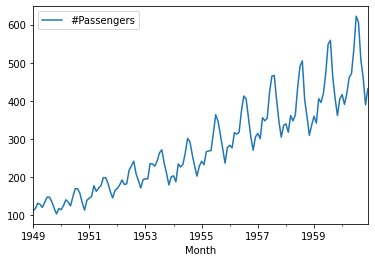

In [16]:
A.plot()

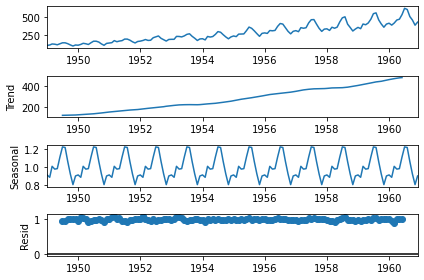

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
fig = seasonal_decompose(A, model = "multiplicative")
fig.plot()
plt.show()

# Dickey-fuller test

In [21]:
A.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(A[["#Passengers"]])

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593],
       [-1.21538918],
       [-1.10664719],
       [-1.10664719],
       [-1.20702441],
       [-1.34922546],
       [-1.47469699],
       [-1.35759023],
       [-1.38268454],
       [-1.29067209],
       [-1.16520057],
       [-1.21538918],
       [-1.29903686],
       [-1.09828242],
       [-0.9226223 ],
       [-0.9226223 ],
       [-1.02299951],
       [-1.23211871],
       [-1.3910493 ],
       [-1.17356534],
       [-1.1317415 ],
       [-1.08991766],
       [-0.85570415],
       [-0.98117567],
       [-0.90589276],
       [-0.85570415],
       [-0.68004402],
       [-0.68004402],
       [-0.80551554],
       [-0.98954044],
       [-1.12337673],
       [-0.95608137],
       [-0.91425753],
       [-0.83897462],
       [-0.73023263],
       [-0.83060985],
       [-0.81388031],
       [-0.52111343],
       [-0.42073621],
       [-0.320359  ],
       [-0.59639634],
       [-0

In [23]:
A[["#Passengers"]].mean()

#Passengers    280.298611
dtype: float64

In [24]:
import numpy as np
log_pass = np.log(A[["#Passengers"]])
rm = log_pass.rolling(window=12).mean()
A['diff'] = log_pass-rm

In [25]:
B = A[A['diff'].isnull()==False]

In [26]:
B = B.drop(labels = ['#Passengers'], axis = 1)

In [27]:
B.columns= ["Pass"]

In [29]:
B.head()

,Pass
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [30]:
from statsmodels.tsa.stattools import adfuller
x = adfuller(pd.Series(B['Pass']))
if(x[1]<0.05):
    print("Stationary")
else:
    print("Non stationary")

Stationary


In [32]:
from statsmodels.tsa.stattools import adfuller
x = adfuller(pd.Series(A['#Passengers']))
if(x[1]<0.05):
    print("Stationary")
else:
    print("Non stationary")

Non stationary
